In [1]:
from keras.datasets import reuters

(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

print(len(train_data), len(test_data))

2121728/2110848 [==============================] - 2s 1us/step
8982 2246


In [2]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [3]:
# decoding (num to word)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,"?") for i in train_data[0]])
print(decoded_newswire)

565248/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
def to_one_hot(lables, dimension=46):
    results = np.zeros((len(lables), dimension))
    for i, label in enumerate(lables):
        results[i, label] = 1.
    return results

one_hot_labels_train = to_one_hot(train_label)
one_hot_labels_test = to_one_hot(test_label)

In [33]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_label)
one_hot_test_labels = to_categorical(test_label)
print(one_hot_labels_train)
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
# define model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

print(x_val, y_val)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.7805 - accuracy: 0.5236 - val_loss: 1.8459 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4759 - accuracy: 0.7088 - val_loss: 1.3325 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0607 - accuracy: 0.7799 - val_loss: 1.1349 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8324 - accuracy: 0.8257 - val_loss: 1.0281 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6617 - accuracy: 0.8633 - val_loss: 0.9918 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5356 - accuracy: 0.8884 - val_loss: 0.9277 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4315 - accuracy: 0.9116 - val_loss: 0.8956 - val_accuracy: 0.8150
Epoch 8/20
16/16 

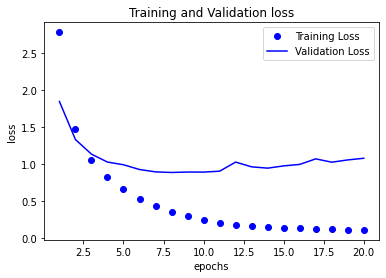

In [44]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation loss")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.show()

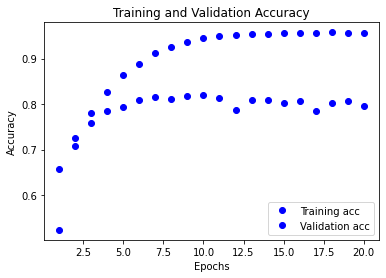

In [45]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'bo', label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

9 epochs 이후부터 overfitting 되는 것을 확인할 수 있다. 

In [46]:
# remodeling
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_labels_test)
print(results)                

Epoch 1/9
16/16 [==============================] - 0s 22ms/step - loss: 0.1134 - accuracy: 0.9580 - val_loss: 1.0753 - val_accuracy: 0.8030
Epoch 2/9
16/16 [==============================] - 0s 9ms/step - loss: 0.1088 - accuracy: 0.9560 - val_loss: 1.0960 - val_accuracy: 0.8020
Epoch 3/9
16/16 [==============================] - 0s 9ms/step - loss: 0.1078 - accuracy: 0.9578 - val_loss: 1.1209 - val_accuracy: 0.7990
Epoch 4/9
16/16 [==============================] - 0s 9ms/step - loss: 0.1017 - accuracy: 0.9579 - val_loss: 1.1392 - val_accuracy: 0.8000
Epoch 5/9
16/16 [==============================] - 0s 9ms/step - loss: 0.1015 - accuracy: 0.9580 - val_loss: 1.1293 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 0s 9ms/step - loss: 0.1008 - accuracy: 0.9567 - val_loss: 1.1960 - val_accuracy: 0.7920
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.0966 - accuracy: 0.9604 - val_loss: 1.1217 - val_accuracy: 0.8020
Epoch 8/9
16/16 [========

In [47]:
predictions = model.predict(x_test)

In [48]:
predictions[0].shape

(46,)

In [49]:
np.sum(predictions[0])

1.0000001

In [50]:
np.argmax(predictions[0])

3

In [52]:
print(predictions)

[[3.50891582e-06 6.03197577e-07 2.33774378e-09 ... 1.59405510e-11
  4.76958100e-12 6.44901285e-11]
 [9.96002655e-06 9.24227059e-01 2.06516233e-06 ... 4.19092649e-10
  4.50704029e-15 1.16353993e-04]
 [3.70151101e-05 9.90755379e-01 5.01987415e-05 ... 1.11536895e-08
  1.32249975e-10 7.27585984e-06]
 ...
 [4.95676750e-06 7.63950879e-07 2.84046084e-08 ... 5.30290034e-10
  2.95967140e-10 4.13897361e-09]
 [8.71014688e-03 3.45042497e-01 8.60623433e-04 ... 6.18703098e-06
  1.00107820e-06 1.18663280e-04]
 [3.89027628e-06 9.86600816e-01 2.67828058e-04 ... 1.07850475e-08
  4.14472723e-09 1.45114498e-07]]


# 충분히 큰 중간층을 두어야 하는 이유

마지막 출력층이 46차원이므로 중간층은 46차원 보다는 커야한다.
<br/>작다면 leak가 발생해 bottleneck이 생긴다.

### -> 중간 layer를 4차원으로 낮춘경우 약 11% 감소를 보인다

In [53]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_labels_test)
print(results)                

Epoch 1/9
16/16 [==============================] - 1s 17ms/step - loss: 3.3771 - accuracy: 0.1238 - val_loss: 2.9552 - val_accuracy: 0.2250
Epoch 2/9
16/16 [==============================] - 0s 11ms/step - loss: 2.6420 - accuracy: 0.3593 - val_loss: 2.3936 - val_accuracy: 0.5740
Epoch 3/9
16/16 [==============================] - 0s 10ms/step - loss: 2.1032 - accuracy: 0.5868 - val_loss: 1.9792 - val_accuracy: 0.6010
Epoch 4/9
16/16 [==============================] - 0s 9ms/step - loss: 1.7106 - accuracy: 0.6356 - val_loss: 1.7028 - val_accuracy: 0.6350
Epoch 5/9
16/16 [==============================] - 0s 10ms/step - loss: 1.4570 - accuracy: 0.6675 - val_loss: 1.5490 - val_accuracy: 0.6470
Epoch 6/9
16/16 [==============================] - 0s 9ms/step - loss: 1.2947 - accuracy: 0.6860 - val_loss: 1.4564 - val_accuracy: 0.6630
Epoch 7/9
16/16 [==============================] - 0s 9ms/step - loss: 1.1833 - accuracy: 0.7015 - val_loss: 1.4177 - val_accuracy: 0.6640
Epoch 8/9
16/16 [======

## 차원수를 더 높인 경우 정확도가 더 높아지지만, 한계가 있다.
128 -> 1%.p 상승

In [54]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_labels_test)
print(results)    

Epoch 1/9
16/16 [==============================] - 1s 28ms/step - loss: 2.1913 - accuracy: 0.5569 - val_loss: 1.3983 - val_accuracy: 0.6840
Epoch 2/9
16/16 [==============================] - 0s 10ms/step - loss: 1.1235 - accuracy: 0.7553 - val_loss: 1.1076 - val_accuracy: 0.7560
Epoch 3/9
16/16 [==============================] - 0s 10ms/step - loss: 0.7842 - accuracy: 0.8319 - val_loss: 0.9458 - val_accuracy: 0.8020
Epoch 4/9
16/16 [==============================] - 0s 10ms/step - loss: 0.5728 - accuracy: 0.8757 - val_loss: 0.8711 - val_accuracy: 0.8200
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4135 - accuracy: 0.9132 - val_loss: 0.8572 - val_accuracy: 0.8210
Epoch 6/9
16/16 [==============================] - 0s 10ms/step - loss: 0.3165 - accuracy: 0.9325 - val_loss: 0.8809 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 10ms/step - loss: 0.2454 - accuracy: 0.9441 - val_loss: 0.8662 - val_accuracy: 0.8210
Epoch 8/9
16/16 [===